# Different time scales of opinion updates. How these values affect an infected and recovered rate? -- Heatmap `p` vs `q` 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import os
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

plt.style.use("../config/custom_plots.mplstyle")

```yaml
nAgents: 10000
nSteps: 1000000
nSaveSteps: 1
nRuns: 1
networkP: 0.8
networkM: 10
additionalLinksFraction: 0.01
virtualLayer: true
epidemicLayer: true
comorbidities: false
qVoterParameters:
  p: 0.01
  q: 6
epidemicLayerParameters:
  beta: 0.9
  alpha: 0.0
  zeta: 0.0
  gamma: 0.5
  mu: 0.9
  kappa: 0.1
maxInfectedTimeMean: 10
maxInfectedTimeStd: 5
positiveOpinionFraction: 1.0
infectedFraction: 0.1
fractionIllnessA: 0.0
fractionIllnessB: 0.0
proPisFraction: 0.0 # do not use this!
pisVaccinationCorrelation: 0.0
outputFolder: simulations/heatmap_p_vs_q_nruns1
firstParameterRange:
  start: 0.0
  end: 0.5
  count: 51
  vals: null
  type: p
secondParameterRange:
  start: 0.0
  end: 1.0
  count: 21
  vals: [0.01, 0.02, 0.05, 0.1, 0.5]
  type: beta
thirdParameterRange:
  start: 0.0
  end: 0.0
  count: 0
  vals: [1, 5, 10, 20]
  type: nQVoterPerStep
linksRemoval: true
nQVoterPerStep: 1
```

q=3,4,...,20

In [3]:
def load_df(prefix, fracPos, beta, folder, p, q, qvotersteps, nagents=10000, nsteps=100, nruns=10):
    dfs = []
    for n in range(nruns):
        path = f"../simulations/{folder}/{prefix}_NAGENTS={nagents}_NSTEPS={nsteps}_NETWORKP=0.8_FRAC_LINKS=0.01_FRAC_POS_OPINION={fracPos}_FRAC_INFECTED=0.1_QVOTER=p={p}_q={q}_PIS=0.0_EPIDEMIC=beta={beta}_zeta=0,00_alpha=0,00_gamma=0,50_mu=0,90_kappa=0,10_QVOTERSTEPS={qvotersteps}_NRUN={n}.tsv"

        df = pd.read_csv(path, sep="\t")
        dfs.append(df)
    dfs1 = pd.DataFrame(np.array([x.to_numpy() for x in dfs]).mean(axis=0),
                        index=df.index, 
                        columns=df.columns)
    return dfs1


ps = ['{:.2f}'.format(x / 100) for x in list(range(51))]
ps = [p.replace('.', ',') for p in ps]
betas = ['0.01', '0.02', '0.05', '0.10', '0.50']
betas = [b.replace('.', ',') for b in betas]

# qs = list(range(3, 21))
# qs = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
qs = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

print('ps: ', ps)
print('qs: ', qs)
print('Betas: ', betas)

ps:  ['0,00', '0,01', '0,02', '0,03', '0,04', '0,05', '0,06', '0,07', '0,08', '0,09', '0,10', '0,11', '0,12', '0,13', '0,14', '0,15', '0,16', '0,17', '0,18', '0,19', '0,20', '0,21', '0,22', '0,23', '0,24', '0,25', '0,26', '0,27', '0,28', '0,29', '0,30', '0,31', '0,32', '0,33', '0,34', '0,35', '0,36', '0,37', '0,38', '0,39', '0,40', '0,41', '0,42', '0,43', '0,44', '0,45', '0,46', '0,47', '0,48', '0,49', '0,50']
qs:  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Betas:  ['0,01', '0,02', '0,05', '0,10', '0,50']


In [4]:
def load_dfs(fracPos, qvotersteps, beta, ps=ps, qs=qs,
             path='heatmap_p_vs_q_nruns_10', prefix='off', nruns=10):
    """
    { q: list of dataframes, one per `p` value }
    
    e.g.

    {2: [pd.DataFrame(p=0.00), pd.DataFrame(p=0.01), ...]}
    """
    xs = {}
    for q in tqdm(qs):
        xs_per_q = []
        for p in ps:
            df1 = load_df(prefix, fracPos, beta, path, p, q, qvotersteps, nruns=nruns)
            xs_per_q.append(df1)
        xs[q] = xs_per_q
    return xs


def load_all_dfs(beta, qvotersteps_all, ps=ps, qs=qs, fracPos='1.0', prefix='on', nruns=1):
    """
    { qvoterstep: {beta: list of dataframes}, ... }
    """
    df_per_qvotersteps = {}
    for qvotersteps in qvotersteps_all:
        df_per_qvotersteps[qvotersteps] = load_dfs(fracPos, qvotersteps, beta, ps=ps, qs=qs, prefix=prefix, nruns=nruns)
    return df_per_qvotersteps 

In [5]:
ps_float = [float(p.replace(',', '.')) for p in ps]
len(ps_float)

51

In [6]:
%%time

qvotersteps_all = [1, 5, 10, 20]

dfs_betas = {}
for beta in betas:
    dfs_betas[beta] = load_all_dfs(beta, qvotersteps_all, ps=ps, qs=qs, prefix='off')    

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

CPU times: user 2min 20s, sys: 2.35 s, total: 2min 22s
Wall time: 2min 21s


In [7]:
def time_max_infected(dfs):
    times = []
    for df in dfs:
        t = df[df['infectedRate'] == df['infectedRate'].max()].step.to_numpy()[0]
        times.append(t)
    return np.array(times)
    
def max_by_columns(dfs, column):
    val = []
    for df in dfs:
        i = df[column].max()
        val.append(i)
    return np.array(val)

def last_by_columns(dfs, column):
    val = []
    for df in dfs:
        i = df[column].to_numpy()[-1]
        val.append(i)
    return np.array(val)


def time_to_no_susceptible(dfs):
    val = []
    for df in dfs:
        i = df[df['susceptibleRate'] < 1e-2].step.values
        if len(i) >= 1:
            val.append(i[0])
        else:
            val.append(0)
    return val

In [115]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

ps_float = [float(p.replace(',', '.')) for p in ps]

def max_infection_rate(df):
    return df['infectedRate'].max()
    
def last_opinion(df):
    return df['meanOpinion'].to_numpy()[-1]

def last_recovered_rate(df):
    return df['recoveredRate'].to_numpy()[-1]
 
    
def get_min_max_df(df_qs, fun):
    qs_labels = np.array(list(range(2, 21)))
    vals = []
    qvoter_vals = []
    for q, dfs_per_p in df_qs.items():
        vals_per_p = []
        for df in dfs_per_p:
            vals_per_p.append(fun(df))        
        vals.append(vals_per_p)
    vals = np.array(vals)
    
    val_min = np.min(vals)
    val_max = np.max(vals)
    return val_min, val_max


def plot_heatmap_p_vs_q(df_qs, fun, ps_float, vmin, vmax, add_colormap=False, ax=None):
    qs_labels = np.array(list(range(2, 21)))
    vals = []
    qvoter_vals = []
    for q, dfs_per_p in df_qs.items():
        vals_per_p = []
        for df in dfs_per_p:
            vals_per_p.append(fun(df))        
        vals.append(vals_per_p)
    vals = np.array(vals)
    
    if ax is not None:
        im = ax.imshow(vals, cmap='magma', aspect='auto', vmin=vmin, vmax=vmax)
    else:
        im = plt.imshow(vals, cmap='magma', aspect='auto', vmin=vmin, vmax=vmax)

    ax.set_xticks(range(0, 51, 10))
    ax.set_xticklabels(ps_float[::10])
    ax.set_xlabel(r'$p$', fontsize=25)
    
    ax.set_yticks((qs_labels - 2)[::3])
    ax.set_yticklabels(qs_labels[::3])
    
    ax.set_ylabel(r'$q$', fontsize=25)
    ax.invert_yaxis()
    
    return im
#     if add_colormap:
#         plt.colorbar(use_gridspec=False, cax=cax, location="right", fraction=0.046, pad=0.04)
#         plt.colorbar(fraction=0.046, pad=0.04)
#     return val_min, val_max
#     return ax


In [75]:
def plot_heatmaps_per_beta(dfs_beta, qvotersteps_all, fun=max_infection_rate, draw_qvoter_transition=False):
    plt.figure(figsize=(10, 10))
    i = 1
    for qvotersteps in qvotersteps_all:
        plt.subplot(2, 2, i)
        plot_heatmap_p_vs_q(dfs_beta[qvotersteps], fun, ps_float, 
                            draw_qvoter_transition=draw_qvoter_transition) 
        plt.title(f'qsteps={qvotersteps}', loc='left')
        i += 1

In [126]:
def get_vmin_vmax(dfs_beta):
    qvotersteps_tmp = [1, 5, 20]

    val_min = []
    val_max = []

    for vstep in qvotersteps_all_tmp:
        i, j = get_min_max_df(dfs_beta[vstep], max_infection_rate)
        val_min.append(i)
        val_max.append(j)

    val_min = np.min(val_min)
    val_max = np.max(val_max)
    return val_min, val_max

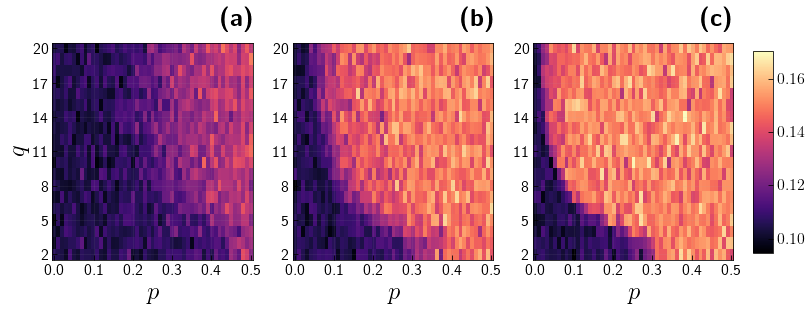

In [127]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))

qvotersteps_tmp = [1, 5, 20]
s = [r'\textbf{(a)}', r'\textbf{(b)}', r'\textbf{(c)}']
val_min, val_max = get_vmin_vmax(dfs_betas["0,01"])
i = 0
for ax in axs:
    im = plot_heatmap_p_vs_q(dfs_betas["0,01"][qvotersteps_tmp[i]], max_infection_rate, 
                             ps_float, val_min, val_max, add_colormap=False, ax=ax)
    ax.text(42.5, 20, s[i], fontsize=25)
    if i == 1 or i == 2:
        ax.set_ylabel('')
    i += 1
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)

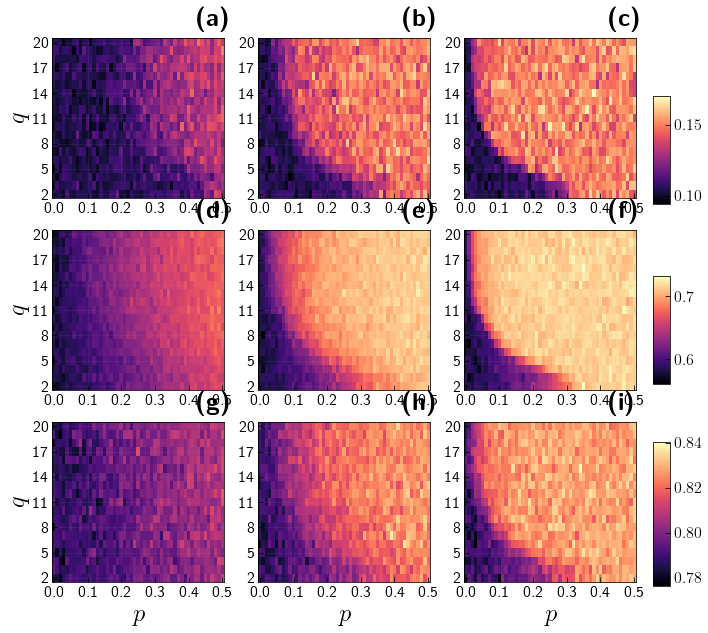

In [145]:
fig, axs = plt.subplots(3, 3, figsize=(12, 10))
qvotersteps_tmp = [1, 5, 20]

s = [r'\textbf{(a)}', r'\textbf{(b)}', r'\textbf{(c)}']
val_min, val_max = get_vmin_vmax(dfs_betas["0,01"])
i = 0
for ax in list(axs.flat)[:3]:
    im = plot_heatmap_p_vs_q(dfs_betas["0,01"][qvotersteps_tmp[i]], max_infection_rate, 
                             ps_float, val_min, val_max, add_colormap=False, ax=ax)
    ax.text(42.5, 20, s[i], fontsize=25)
    if i == 1 or i == 2:
        ax.set_ylabel('')
    i += 1
    ax.set_xlabel('')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.65, 0.02, 0.15])
fig.colorbar(im, cax=cbar_ax)


s = [r'\textbf{(d)}', r'\textbf{(e)}', r'\textbf{(f)}']
val_min, val_max = get_vmin_vmax(dfs_betas["0,10"])
i = 0
for ax in list(axs.flat)[3:6]:
    im = plot_heatmap_p_vs_q(dfs_betas["0,10"][qvotersteps_tmp[i]], max_infection_rate, 
                             ps_float, val_min, val_max, add_colormap=False, ax=ax)
    ax.text(42.5, 20, s[i], fontsize=25)
    if i == 1 or i == 2:
        ax.set_ylabel('')
    i += 1
    ax.set_xlabel('')

cbar_ax2 = fig.add_axes([0.82, 0.4, 0.02, 0.15])
fig.colorbar(im, cax=cbar_ax2)


s = [r'\textbf{(g)}', r'\textbf{(h)}', r'\textbf{(i)}']
val_min, val_max = get_vmin_vmax(dfs_betas["0,50"])
i = 0
for ax in list(axs.flat)[6:]:
    im = plot_heatmap_p_vs_q(dfs_betas["0,50"][qvotersteps_tmp[i]], max_infection_rate, 
                             ps_float, val_min, val_max, add_colormap=False, ax=ax)
    ax.text(42.5, 20, s[i], fontsize=25)
    if i == 1 or i == 2:
        ax.set_ylabel('')
    i += 1

cbar_ax3 = fig.add_axes([0.82, 0.12, 0.02, 0.2])
fig.colorbar(im, cax=cbar_ax3)

## Infection peak

In [34]:
# for beta in betas:
#     plot_heatmaps_per_beta(dfs_betas[beta], qvotersteps_all, draw_qvoter_transition=False)
#     plt.suptitle(r'$\beta={}$'.format(beta), fontsize=30)
# plt.show()

## When does the peak arise?

In [60]:
# def time_max_infection(df):
#     return df[df['infectedRate'] == df['infectedRate'].max()].step.to_numpy()[0]


# for beta in betas:
#     plot_heatmaps_per_beta(dfs_betas[beta], qvotersteps_all, fun=time_max_infection, draw_qvoter_transition=True)
#     plt.suptitle(r'$\beta={}$'.format(beta), fontsize=30)
#     plt.show()

## Recovered rate

In [61]:
# for beta in betas:
#     plot_heatmaps_per_beta(dfs_betas[beta], qvotersteps_all, fun=last_recovered_rate, draw_qvoter_transition=True)
#     plt.suptitle(r'$\beta={}$'.format(beta), fontsize=30)
# plt.show()